In [1]:
#connect to Google drive
from google.colab import drive

In [2]:
# mount to drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

import numpy as np

In [4]:
# load data
file_path = '/content/drive/My Drive/Colab Notebooks/CPSC 381-581 Final Project/healthcare-dataset-stroke-data.csv'
raw_data = pd.read_csv(file_path)
raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# get summary statistics on each feature of data
raw_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Data preprocessing

In [6]:
# check for missing values
raw_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# check for duplicate values
raw_data.duplicated().sum()

0

In [8]:
# drop the id column since it is irrelevant
raw_data.drop('id', axis=1, inplace=True)

In [9]:
# Investigate bmi column more since it has so many missing values
# Generate descriptive statistics for the 'bmi' column
bmi_stats = raw_data['bmi'].describe()
bmi_stats

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [10]:
# Calculate and display the number of missing values in the BMI column
missing_bmi_count = raw_data['bmi'].isnull().sum()
missing_bmi_count

201

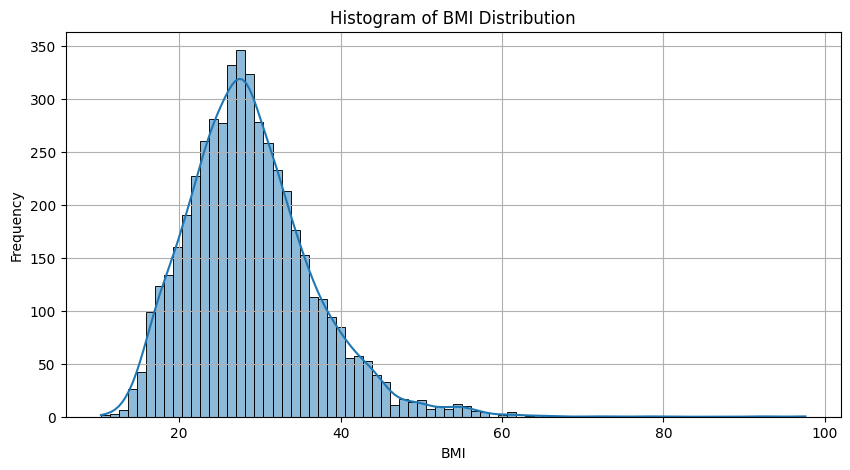

In [11]:
# Plot a histogram of the 'bmi' column
plt.figure(figsize=(10, 5))
sns.histplot(raw_data['bmi'], kde=True)  # Plot a histogram of the 'bmi' column with a kernel density estimate for the distribution
plt.title('Histogram of BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

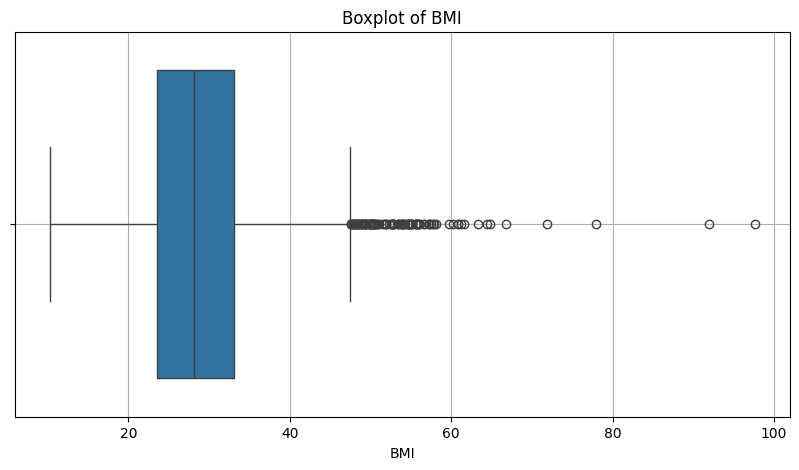

In [12]:
# Visualize outliers with a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=raw_data['bmi'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.grid(True)
plt.show()

In [13]:
# Determine distribution of the 'bmi' column
bmi_values = raw_data['bmi'].dropna()  # Removing missing values for accurate statistics

# Calculate skewness and kurtosis
bmi_skewness = skew(bmi_values)
bmi_kurtosis = kurtosis(bmi_values)

# Perform the Shapiro-Wilk test for normality
shapiro_test = shapiro(bmi_values)

print(f"Skewness: {bmi_skewness}")
print(f"Kurtosis: {bmi_kurtosis}")
print("Shapiro-Wilk test statistic:", shapiro_test.statistic, "p-value:", shapiro_test.pvalue)

Skewness: 1.0550177068872404
Kurtosis: 3.3580131522730943
Shapiro-Wilk test statistic: 0.9535489082336426 p-value: 6.625949432834918e-37


In [14]:
# Impute the missing values of 'bmi' with the median of the column
bmi_median = raw_data['bmi'].median()
raw_data.fillna({'bmi': bmi_median}, inplace=True)
raw_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
# Double check for missing values
raw_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
# make it into a new dataset with reformed columns
clean_data = raw_data.copy()

In [17]:
missing_values_check = clean_data.isnull().sum()
print(missing_values_check)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [18]:
# Identify categorical and numerical columns
numerical_cols = clean_data.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = clean_data.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
Categorical columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [19]:
# Standardize the numerical columns
print("Numerical columns:", numerical_cols)
scaler = StandardScaler()
feature_cols_val = numerical_cols[:-1]  # This excludes 'stroke' which is the last element in the list
clean_data[feature_cols_val] = scaler.fit_transform(clean_data[feature_cols_val])

print(clean_data.head())

Numerical columns: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
   gender       age  hypertension  heart_disease ever_married      work_type  \
0    Male  1.051434     -0.328602       4.185032          Yes        Private   
1  Female  0.786070     -0.328602      -0.238947          Yes  Self-employed   
2    Male  1.626390     -0.328602       4.185032          Yes        Private   
3  Female  0.255342     -0.328602      -0.238947          Yes        Private   
4  Female  1.582163      3.043196      -0.238947          Yes  Self-employed   

  Residence_type  avg_glucose_level       bmi   smoking_status  stroke  
0          Urban           2.706375  1.005086  formerly smoked       1  
1          Rural           2.121559 -0.098981     never smoked       1  
2          Rural          -0.005028  0.472536     never smoked       1  
3          Urban           1.437358  0.719327           smokes       1  
4          Rural           1.501184 -0.631531     never 

In [20]:
print("Categorical columns:", categorical_cols)

Categorical columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


# Data Exploration and Analysis

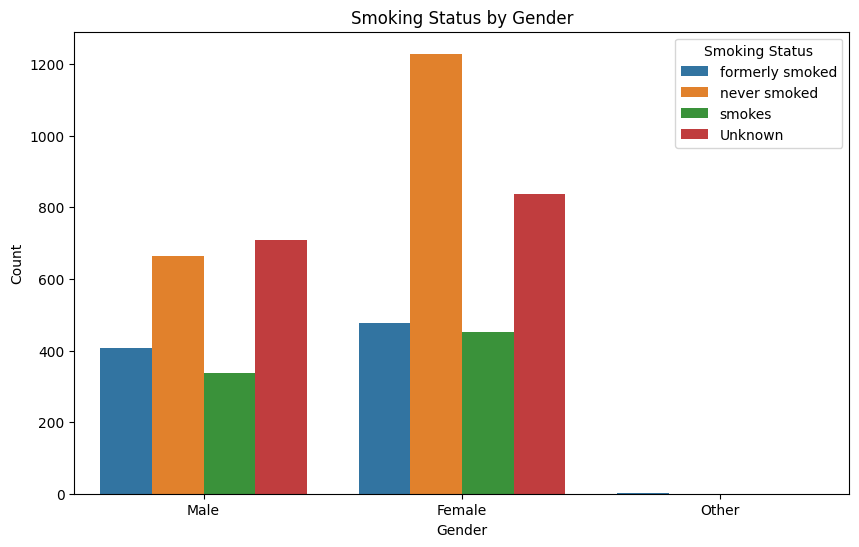

In [21]:
# Smoking Status by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='smoking_status', data=clean_data)
plt.title('Smoking Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.show()

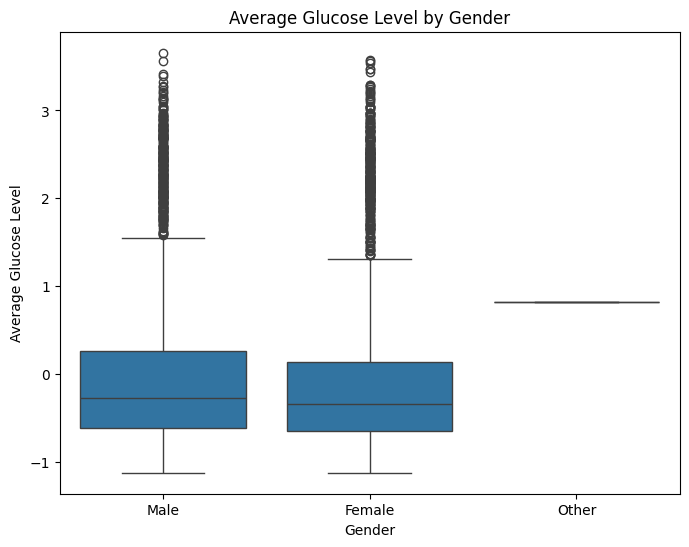

In [22]:
# Average Glucose Level by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='avg_glucose_level', data=clean_data)
plt.title('Average Glucose Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Glucose Level')
plt.show()


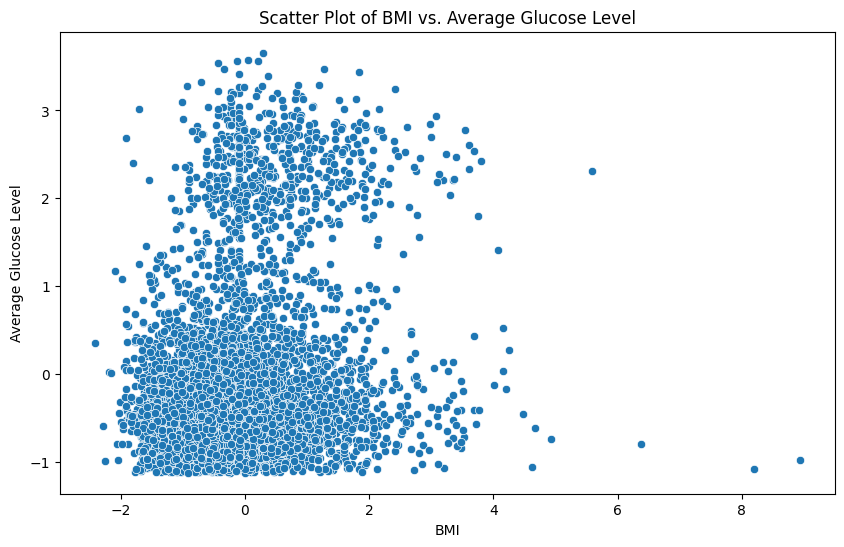

In [23]:
# Scatter plot of BMI vs Average Glucose Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='avg_glucose_level', data=clean_data)
plt.title('Scatter Plot of BMI vs. Average Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.show()

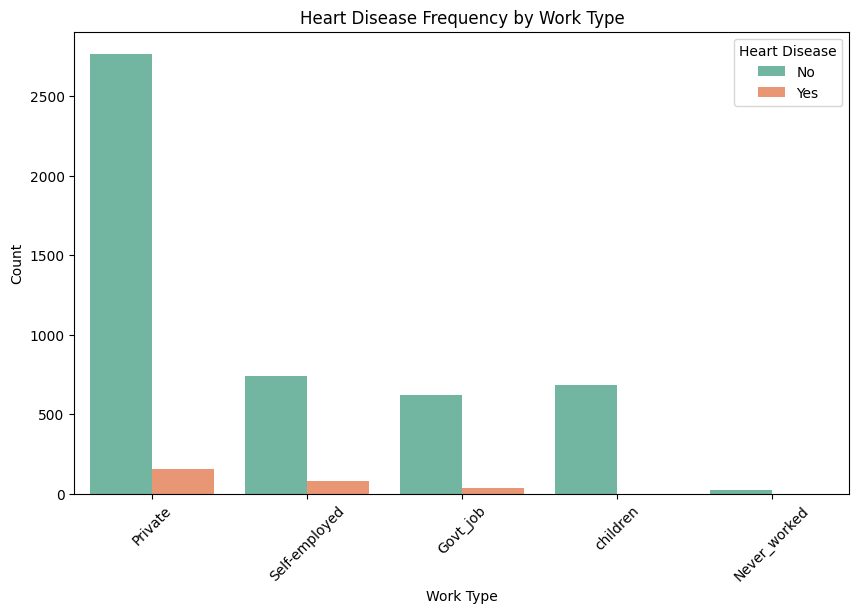

In [24]:
# Barplot of Heart Disease Frequency by Work Type
plt.figure(figsize=(10, 6))
sns.countplot(x='work_type', hue='heart_disease', data=clean_data, palette='Set2')
plt.title('Heart Disease Frequency by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

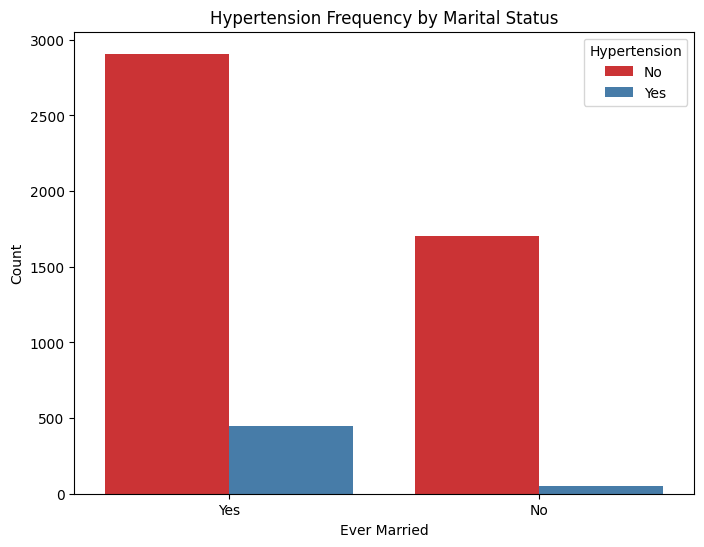

In [25]:
# Barplot of Hypertension Frequency by Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(x='ever_married', hue='hypertension', data=clean_data, palette='Set1')
plt.title('Hypertension Frequency by Marital Status')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.legend(title='Hypertension', labels=['No', 'Yes'])
plt.show()

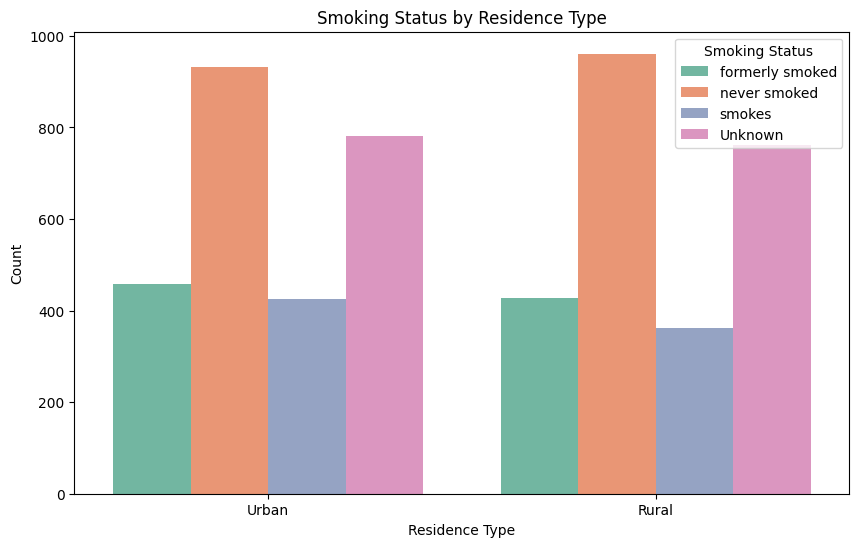

In [26]:
# Barplot of Smoking Status by Residence Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Residence_type', hue='smoking_status', data=clean_data, palette='Set2')
plt.title('Smoking Status by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.show()

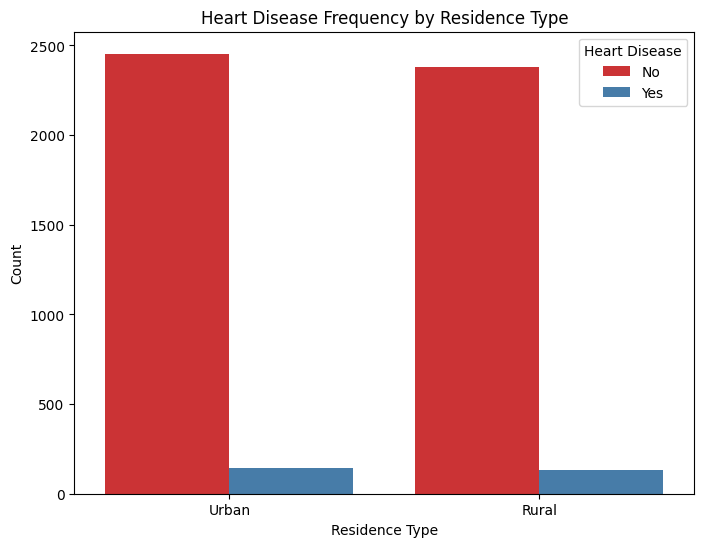

In [27]:
# Barplot of Heart Disease Frequency by Residence Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Residence_type', hue='heart_disease', data=clean_data, palette='Set1')
plt.title('Heart Disease Frequency by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

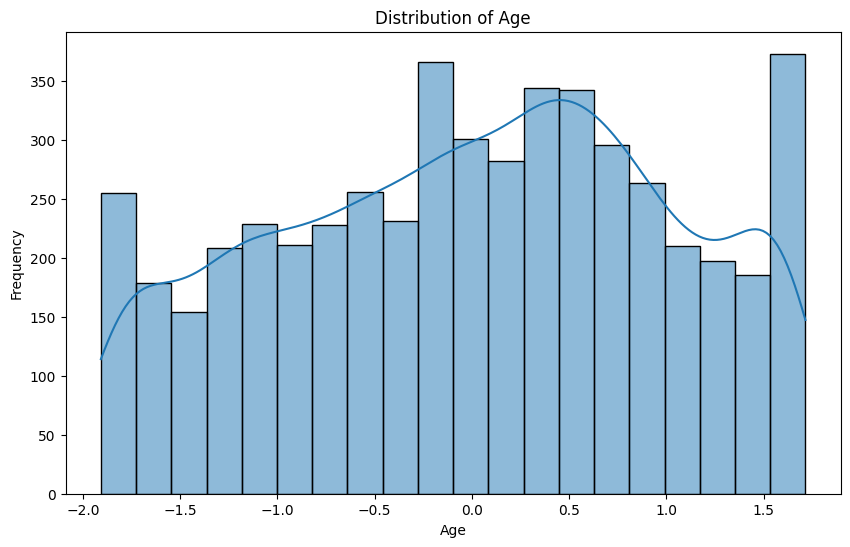

In [28]:
# Histogram of Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

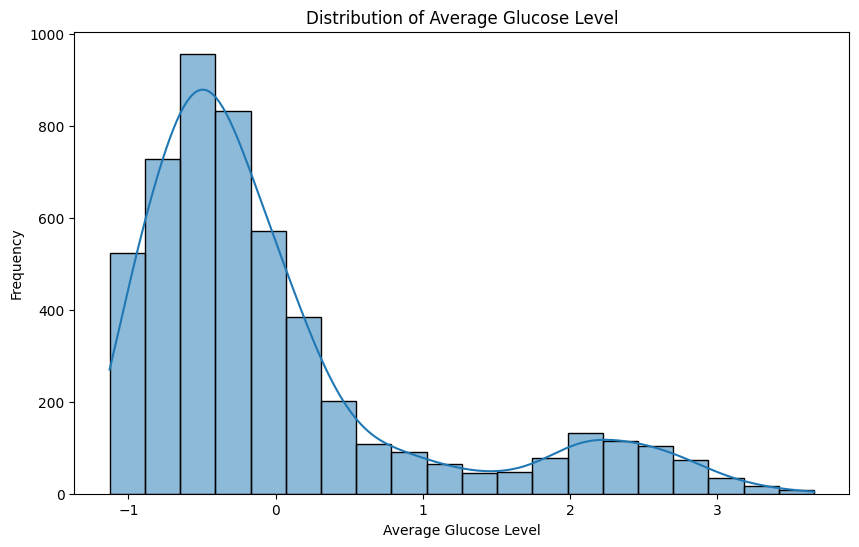

In [29]:
# Histogram Distribution of Average Glucose Level
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['avg_glucose_level'], bins=20, kde=True)
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

# Feature Extraction

In [30]:
clean_data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051434,-0.328602,4.185032,Yes,Private,Urban,2.706375,1.005086,formerly smoked,1
1,Female,0.786070,-0.328602,-0.238947,Yes,Self-employed,Rural,2.121559,-0.098981,never smoked,1
2,Male,1.626390,-0.328602,4.185032,Yes,Private,Rural,-0.005028,0.472536,never smoked,1
3,Female,0.255342,-0.328602,-0.238947,Yes,Private,Urban,1.437358,0.719327,smokes,1
4,Female,1.582163,3.043196,-0.238947,Yes,Self-employed,Rural,1.501184,-0.631531,never smoked,1


In [31]:
# PCA
scaled_numerical = scaler.fit_transform(clean_data[numerical_cols])

# Encode categorical features
encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(clean_data[categorical_cols])

# Combine scaled numerical features and encoded categorical features
features = np.concatenate([scaled_numerical, encoded_categorical], axis=1)

# Choose number of components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

# DataFrame creation
pca_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['stroke'] = clean_data['stroke'].values

print(pca_df.head())

   Principal Component 1  Principal Component 2  stroke
0               4.444421               4.190090       1
1               2.393500               2.248448       1
2               3.632964               3.854861       1
3               2.141312               1.665340       1
4               3.602836               2.498045       1


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


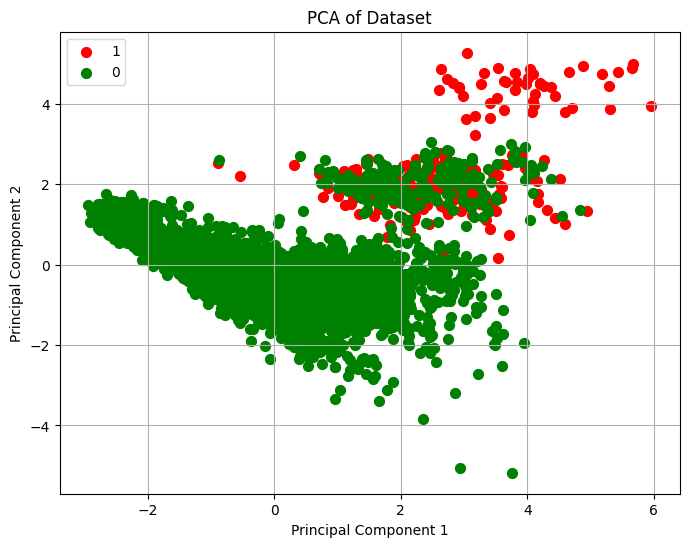

In [32]:
# PCA Plotting
plt.figure(figsize=(8, 6))
targets = pca_df['stroke'].unique()
colors = ['r', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = pca_df['stroke'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'Principal Component 1'],
                pca_df.loc[indicesToKeep, 'Principal Component 2'], c=color, s=50)

plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(targets)
plt.grid(True)
plt.show()

In [33]:
categorical_cols = clean_data.select_dtypes(include=['object']).columns
categorical_data = clean_data[categorical_cols]

# One-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical data
categorical_encoded = encoder.fit_transform(categorical_data)

# DataFrame creation
encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Resetting index
clean_data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Combining categorical data with the rest of the dataset
non_categorical_data = clean_data.drop(categorical_cols, axis=1)
revised_data = pd.concat([non_categorical_data, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


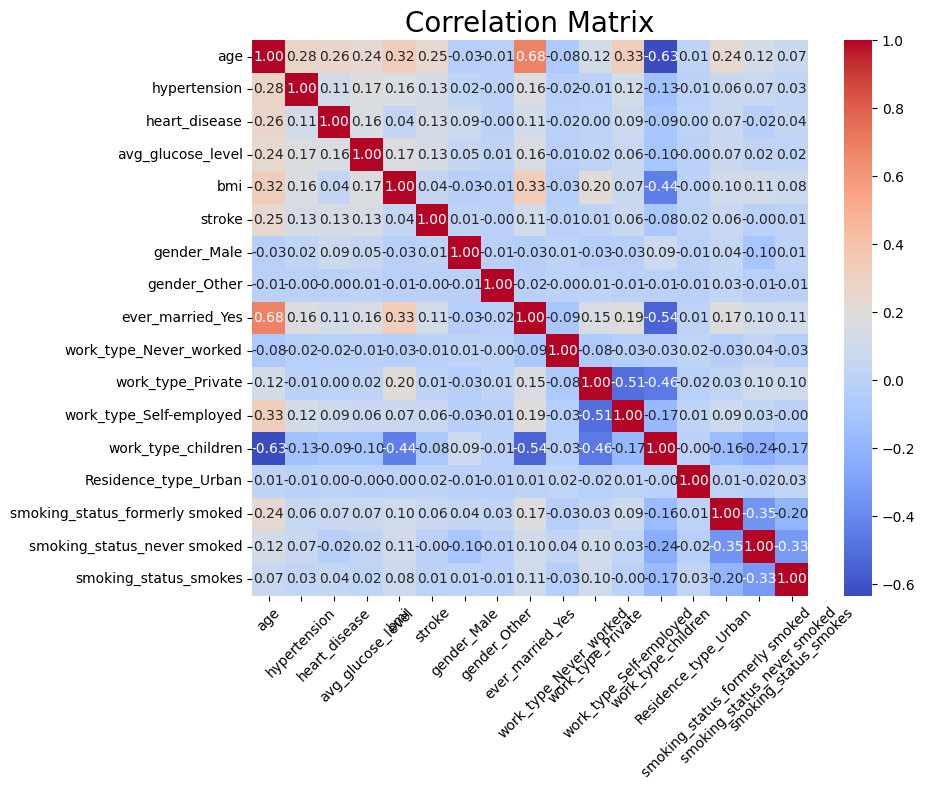

In [34]:
# Correlation Matrix
corr_matrix = revised_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

# ML Model: Random Forest Implementation

Accuracy: 0.9393346379647749
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


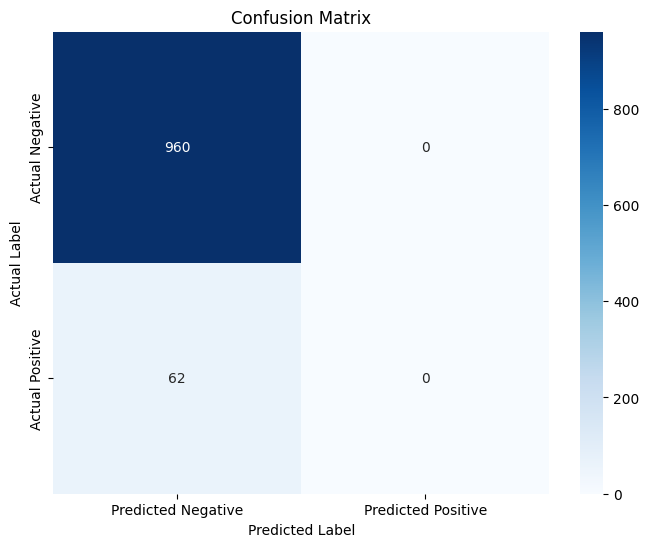

In [41]:
X = revised_data.drop('stroke', axis=1)
y = revised_data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_random_forest.fit(X_train, y_train)

y_pred = classifier_random_forest.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

confusion_matrix_randomforest = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix_randomforest,
                     index = ['Actual Negative', 'Actual Positive'],
                     columns = ['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


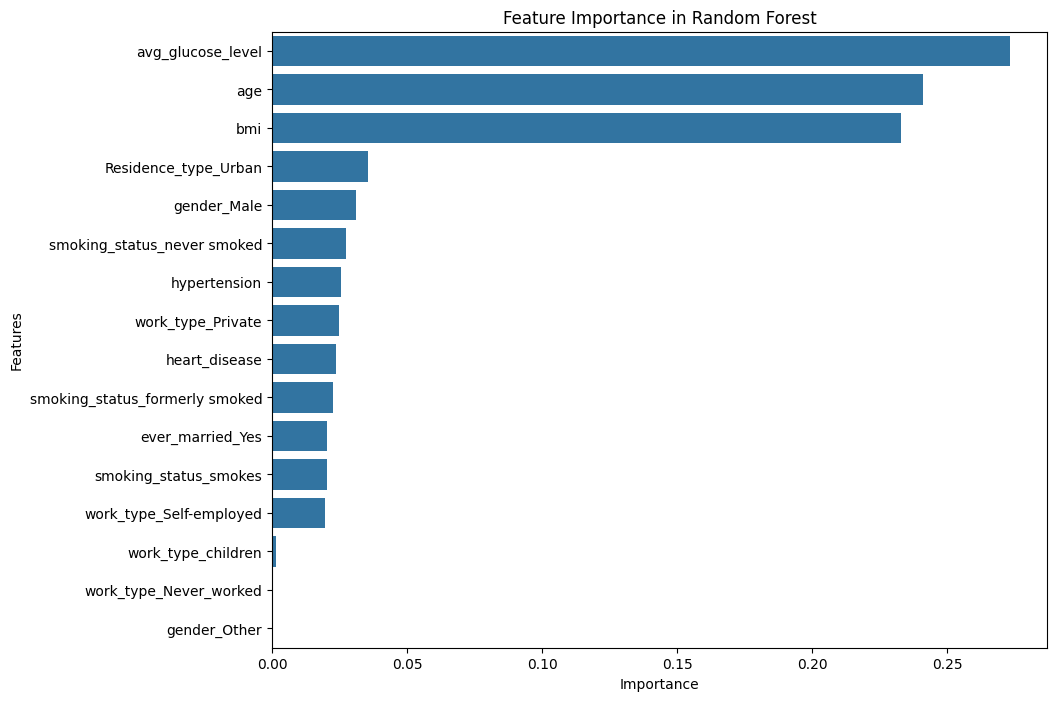

In [39]:
# Feature Importance- Random Forest
feature_importance_randomforest = pd.Series(classifier_random_forest.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance_randomforest, y=feature_importance_randomforest.index)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# ML Model: Gradient Boosting Implementation

Accuracy: 0.9403131115459883
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022



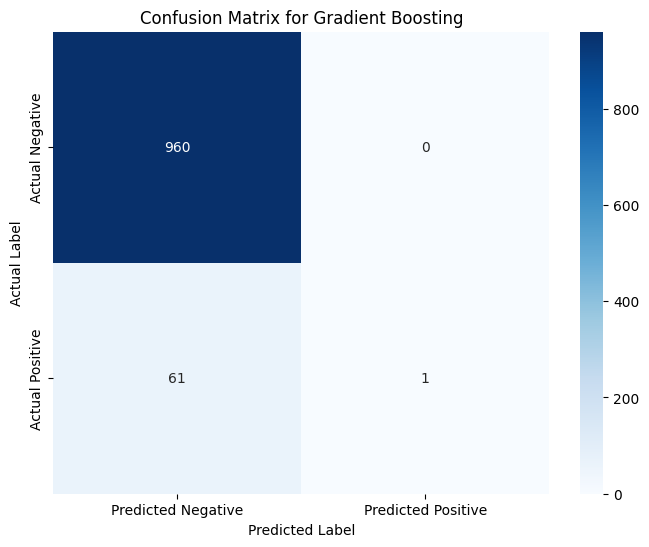

In [40]:
classifier_gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
classifier_gradient_boosting.fit(X_train, y_train)

y_pred_gb = classifier_gradient_boosting.predict(X_test)

#Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

#Convert confusion matrix to DataFrame
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)
confusion_matrix_df_gb = pd.DataFrame(confusion_matrix_gb,
                     index = ['Actual Negative', 'Actual Positive'],
                     columns = ['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_df_gb, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
